<h1 style="text-align: center;">California House</h1>
<h3 style="text-align: center;">Miftah Furqaanul Haq</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Kehidupan manusia tak lepas dari tiga kebutuhan dasar: sandang, pangan, dan papan. Rumah, sebagai representasi dari kebutuhan papan, memegang peranan penting. Harga rumah di berbagai negara berbeda-beda, dengan Amerika Serikat saat ini mencatatkan harga rumah tertinggi.

California, dengan luas wilayah sekitar 423.970 km², memiliki populasi yang melebihi 39,2 juta jiwa. Hal ini menempatkan California sebagai negara bagian Amerika Serikat dengan kepadatan penduduk tertinggi. Meskipun secara luas wilayah berada di urutan ketiga, tingkat kepadatan penduduknya sangat signifikan. Dalam konteks global, California merupakan entitas subnasional terpadat ke-34.

Selama beberapa tahun terakhir, Miller Samuel Inc. telah secara konsisten mengumpulkan data penjualan rumah-rumah mewah di Amerika Serikat yang dihargai lebih dari USD 50 juta.

**1.2 Problem Statements**

Pengembang properti di California tersebut menghadapi tantangan dalam meningkatkan pendapatan dan profitabilitas. Analisis lebih lanjut mengungkapkan bahwa salah satu faktor penyebabnya adalah strategi pemasaran yang kurang optimal. Pendekatan yang terlalu seragam dalam menawarkan produk, yaitu dengan membangun rumah tipe yang sama untuk semua konsumen, dinilai sebagai salah satu penyebab utama masalah ini.

Melalui analisis yang cermat, developer diharapkan dapat memprediksi dan menentukan harga jual rumah yang tidak hanya menarik minat pembeli, tetapi juga memberikan keuntungan yang berkelanjutan.

**1.3 Goals**

Pengembangan aplikasi berbasis data demografis dapat menjadi solusi efektif bagi pengembang properti untuk mempercepat proses pengambilan keputusan, khususnya dalam hal penentuan harga jual rumah dan perumusan strategi pemasaran yang tepat sasaran.

**1.4 Analytical Approach**

Melalui analisis data yang mendalam, kita dapat membangun aplikasi yang mampu memprediksi harga jual rumah secara akurat. Dengan demikian, developer dapat menentukan anggaran pembangunan yang efisien dan menetapkan harga jual yang kompetitif, sehingga daya tarik perumahan semakin meningkat.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

"Untuk mengevaluasi performa model, kita akan menggunakan metrik RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), dan R-squared.

RMSE, MAE, dan MAPE mengukur rata-rata kesalahan prediksi. Semakin kecil nilainya, semakin akurat model. 

R-squared menunjukkan proporsi varians data yang dapat dijelaskan oleh model. Nilai R-squared yang mendekati 1 mengindikasikan model yang sangat baik, namun metrik ini kurang relevan untuk model non-linear."

**1.6 Success Criteria**

## **Section 2. Data Understanding**

● **longitude** (signed numeric - float) : Longitude value for the block in California, USA. 

● **latitude** (numeric - float ) : Latitude value for the block in California, USA. 

● **housing_median_age** (numeric - int ) : Median age of the house in the block. 

● **total_rooms** (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block.

● **total_bedrooms** (numeric - float ) : Count of the total number of bedrooms in all houses in the block. 

● **population** (numeric - int ) : Count of the total number of population in the block. 

● **households** (numeric - int ) : Count of the total number of households in the block. 

● **median_income** (numeric - float ) : Median of the total household income of all the houses in the block. 

● **ocean_proximity** (numeric - categorical ) : Type of the landscape of the block. 

[ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ].

● **median_house_value** (numeric - int ) : Median of the household prices of all the houses in the block.

**2.1 General Information**

| Attribute                | Data Type       | Description                                                           |
|--------------------------|-----------------|-----------------------------------------------------------------------|
| longitude                | Float           | Longitude value for the block in California, USA                      |
| latitude                 | Float           | Latitude value for the block in California, USA                       |
| housing_median_age       | Float           | Median age of the house in the block                                  |
| total_rooms              | Float           | Count of the total number of rooms (excluding bedrooms) in all houses in the block                      |
| total_bedrooms           | Float           | Count of the total number of bedrooms in all houses in the block      |
| population               | Float           | Count of the total number of population in the block                  |
| households               | Float           | Count of the total number of households in the block                  |
| median_income            | Float           | Median of the total household income of all the houses in the block   |
| ocean_proximity          | Object          | Type of the landscape of the block                                    |
| median_house_value       | Float           | Median of the household prices of all the houses in the block         |


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# PCA
from sklearn.decomposition import PCA

# Machine Learning Algoritma
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore warnings until end
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\User\OneDrive\Dokumen\capstone3\machine_learning\data\raw\data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**2.2 Feature Information**

| Attribute                | Description                                                           |Impact          |
|--------------------------|-----------------------------------------------------------------------|----------------|
| longitude                | Longitude value for the block in California, USA                      |Indicates the distance of a point from the equator (north or south).           |
| latitude                 | Latitude value for the block in California, USA                       | Indicates the distance of a point from the prime meridian (east or west)       |
| housing_median_age       | Median age of the house in the block                                  |a significant factor that influences the character, value, and dynamics of a community.           |
| total_rooms              | Count of the total number of rooms (excluding bedrooms) in all houses in the block     |insights into the housing characteristics and potential community impacts           |
| total_bedrooms           | Count of the total number of bedrooms in all houses in the block      | total number of bedrooms in a block, policymakers, urban planners, and real estate professionals can gain valuable insights into the housing market  |
| population               | Count of the total number of population in the block                  |Higher population density leads to increased demand for essential services         |
| households               | Count of the total number of households in the block                  |a critical factor that influences the community's needs, resources, and overall quality of life          |
| median_income            | Median of the total household income of all the houses in the block   |a crucial socioeconomic indicator that has far-reaching impacts on a community           |
| ocean_proximity          | Type of the landscape of the block                                    |a crucial role in shaping the landscape of a block by influencing its climate, geology, vegetation, and human activity|
| median_house_value       | Median of the household prices of all the houses in the block         |a critical indicator of a community's economic health, social well-being, and overall quality of life.|


## **Section 3. Data Cleaning**

### **3.1 Missing Values**

In [4]:

df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### **3.2 Duplicated Values**

In [7]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [8]:
df.drop_duplicates(inplace= True)
df[df.duplicated()].sum()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
ocean_proximity         0
median_house_value    0.0
dtype: object

In [9]:
import missingno as msno

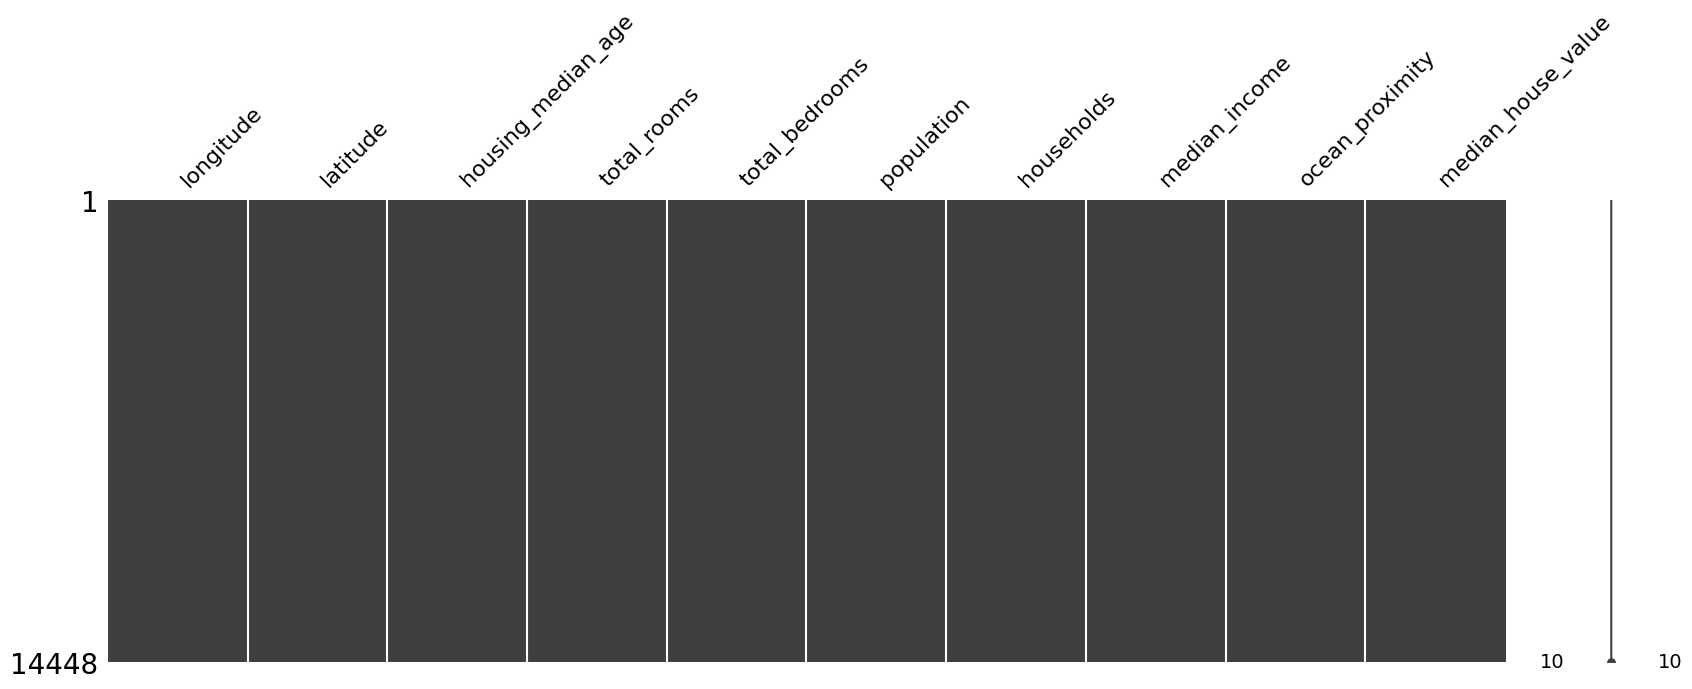

In [10]:
msno.matrix(df, figsize=(20, 6))
plt.show()

**Corelation**

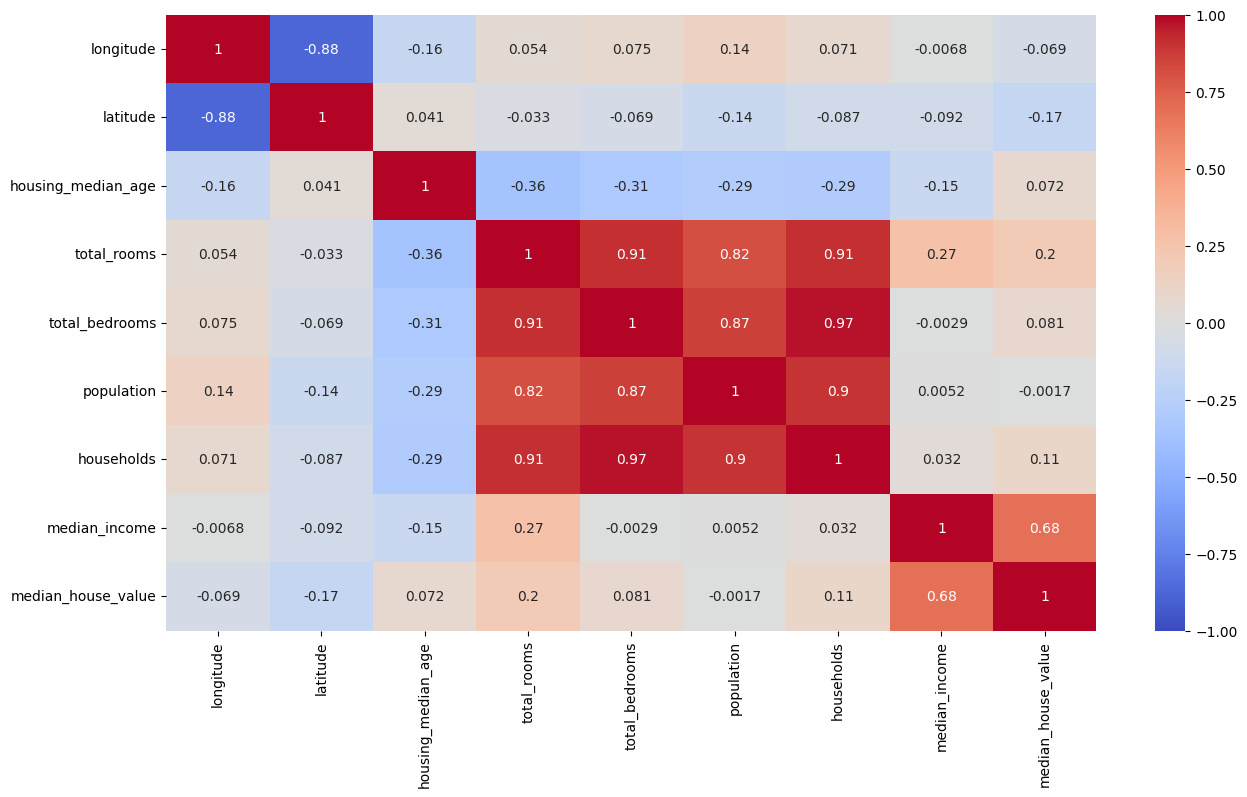

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes('number').corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

Korelasi dikatakan semakin kuat apabila :

* Koefisien korelasi antara 0,81 - 1,00 berarti hubungan antara dua variabel sangat kuat.
* Koefisien korelasi antara 0,61 - 0,81 berarti hubungan antara dua variabel kuat.
* Koefisien korelasi antara 0,41 - 0,60 berarti hubungan antara dua variabel sedang.
* Koefisien korelasi antara 0,21 - 0,41 berarti hubungan antara dua variabel lemah.
* Koefisien korelasi antara 0,00 - 0,21 berarti hubungan antara dua variabel tersebut tidak memiliki hubungan.

Dapat disimpulkan bahwa jika nilai korelasi mendekati angka 0 hingga 1, maka terdapat hubungan yang positif sempurna antara dua variabel. Semakin tinggi nilai korelasi maka semakin kuat hubungan antara dua variabel tersebut.

Hubungan antara feature households dengan total_bedrooms memiliki nilai korelasi paling tinggi yaitu sebesar 0,98. Dari kedua feature tersebut dapat dibuktikan apabila dalam satu rumah tangga memiliki jumlah anggota yang cukup banyak, maka jumlah kamarnya pun juga akan semakin banyak untuk dapat menampung anggota keluarga tersebut.


Outlier

In [12]:

num_feat = ['longitude', 'latitude', 'housing_median_age', 
            'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', 'median_house_value']

In [13]:
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')
    print('_________________________')

In [14]:

find_outlier(df,"housing_median_age")

Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________


In [15]:
for i in num_feat :
    find_outlier(df, i)

Outlier longitude
IQR: 3.799999999999997
limit_bawah: -127.5
limit_atas: -112.30000000000001
_________________________
Outlier latitude
IQR: 3.780000000000001
limit_bawah: 28.259999999999998
limit_atas: 43.38
_________________________
Outlier housing_median_age
IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5
_________________________
Outlier total_rooms
IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5
_________________________
Outlier total_bedrooms
IQR: 349.0
limit_bawah: -227.5
limit_atas: 1168.5
_________________________
Outlier population
IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0
_________________________
Outlier households
IQR: 325.0
limit_bawah: -208.5
limit_atas: 1091.5
_________________________
Outlier median_income
IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001
_________________________
Outlier median_house_value
IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0
_________________________


In [16]:
out1 = df[df['housing_median_age'] >= 65.5]
out2 = df[df['total_rooms'] > 5693.5]
out3 = df[df['total_bedrooms'] > 1168.5]
out4 = df[df['population'] > 3134.0]
out5 = df[df['households'] > 1091.5]
out6 = df[df['median_income'] > 7.984350000000001]
out7 = df[df['median_house_value'] > 480350.0]

In [17]:

out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0
13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0
22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0
45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0
...,...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0
14411,-117.31,33.00,30.0,1631.0,310.0,665.0,297.0,6.8443,NEAR OCEAN,492500.0


In [18]:

out_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2095 entries, 5 to 14446
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2095 non-null   float64
 1   latitude            2095 non-null   float64
 2   housing_median_age  2095 non-null   float64
 3   total_rooms         2095 non-null   float64
 4   total_bedrooms      2095 non-null   float64
 5   population          2095 non-null   float64
 6   households          2095 non-null   float64
 7   median_income       2095 non-null   float64
 8   ocean_proximity     2095 non-null   object 
 9   median_house_value  2095 non-null   float64
dtypes: float64(9), object(1)
memory usage: 180.0+ KB


In [19]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


14.500276854928018

Setelah kita melakukan pengecekan terhadap outlier diatas, kita mendapatkan hasil total outlier adalah 2095 data atau sebanyak 14,5% dari total data.

Bila semua outlier di drop maka akan ada banyak data yang hilang. Oleh sebab itu, saya memutuskan untuk menghapus beberapa outlier yang memiliki nilai yang relatif tinggi dibandingkan dengan data lain. Outlier yang akan dihilangkan akan diinterpretasikan pada boxplot di bawah ini.

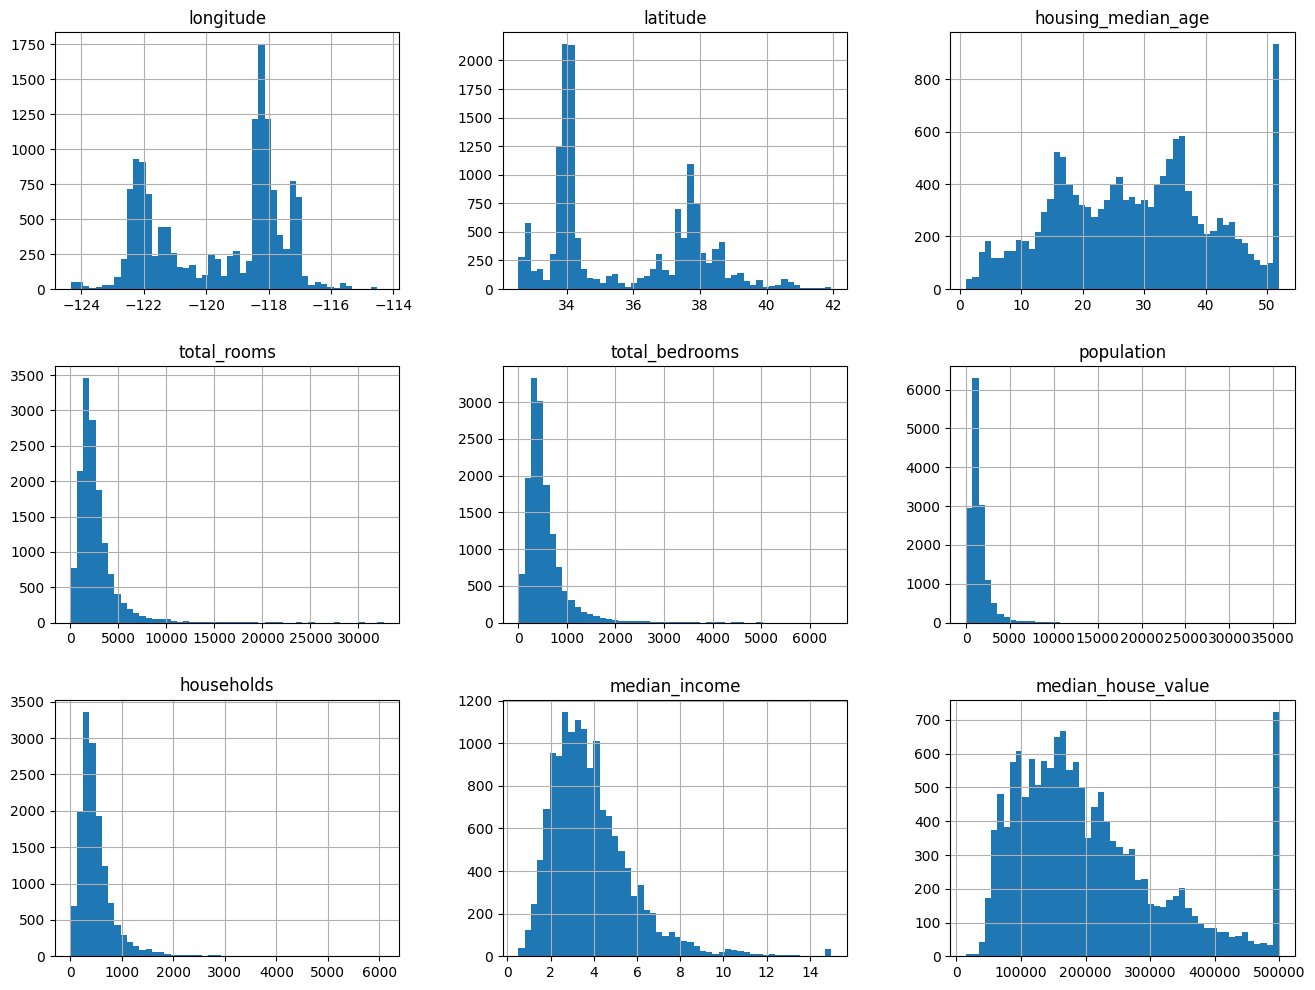

In [20]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

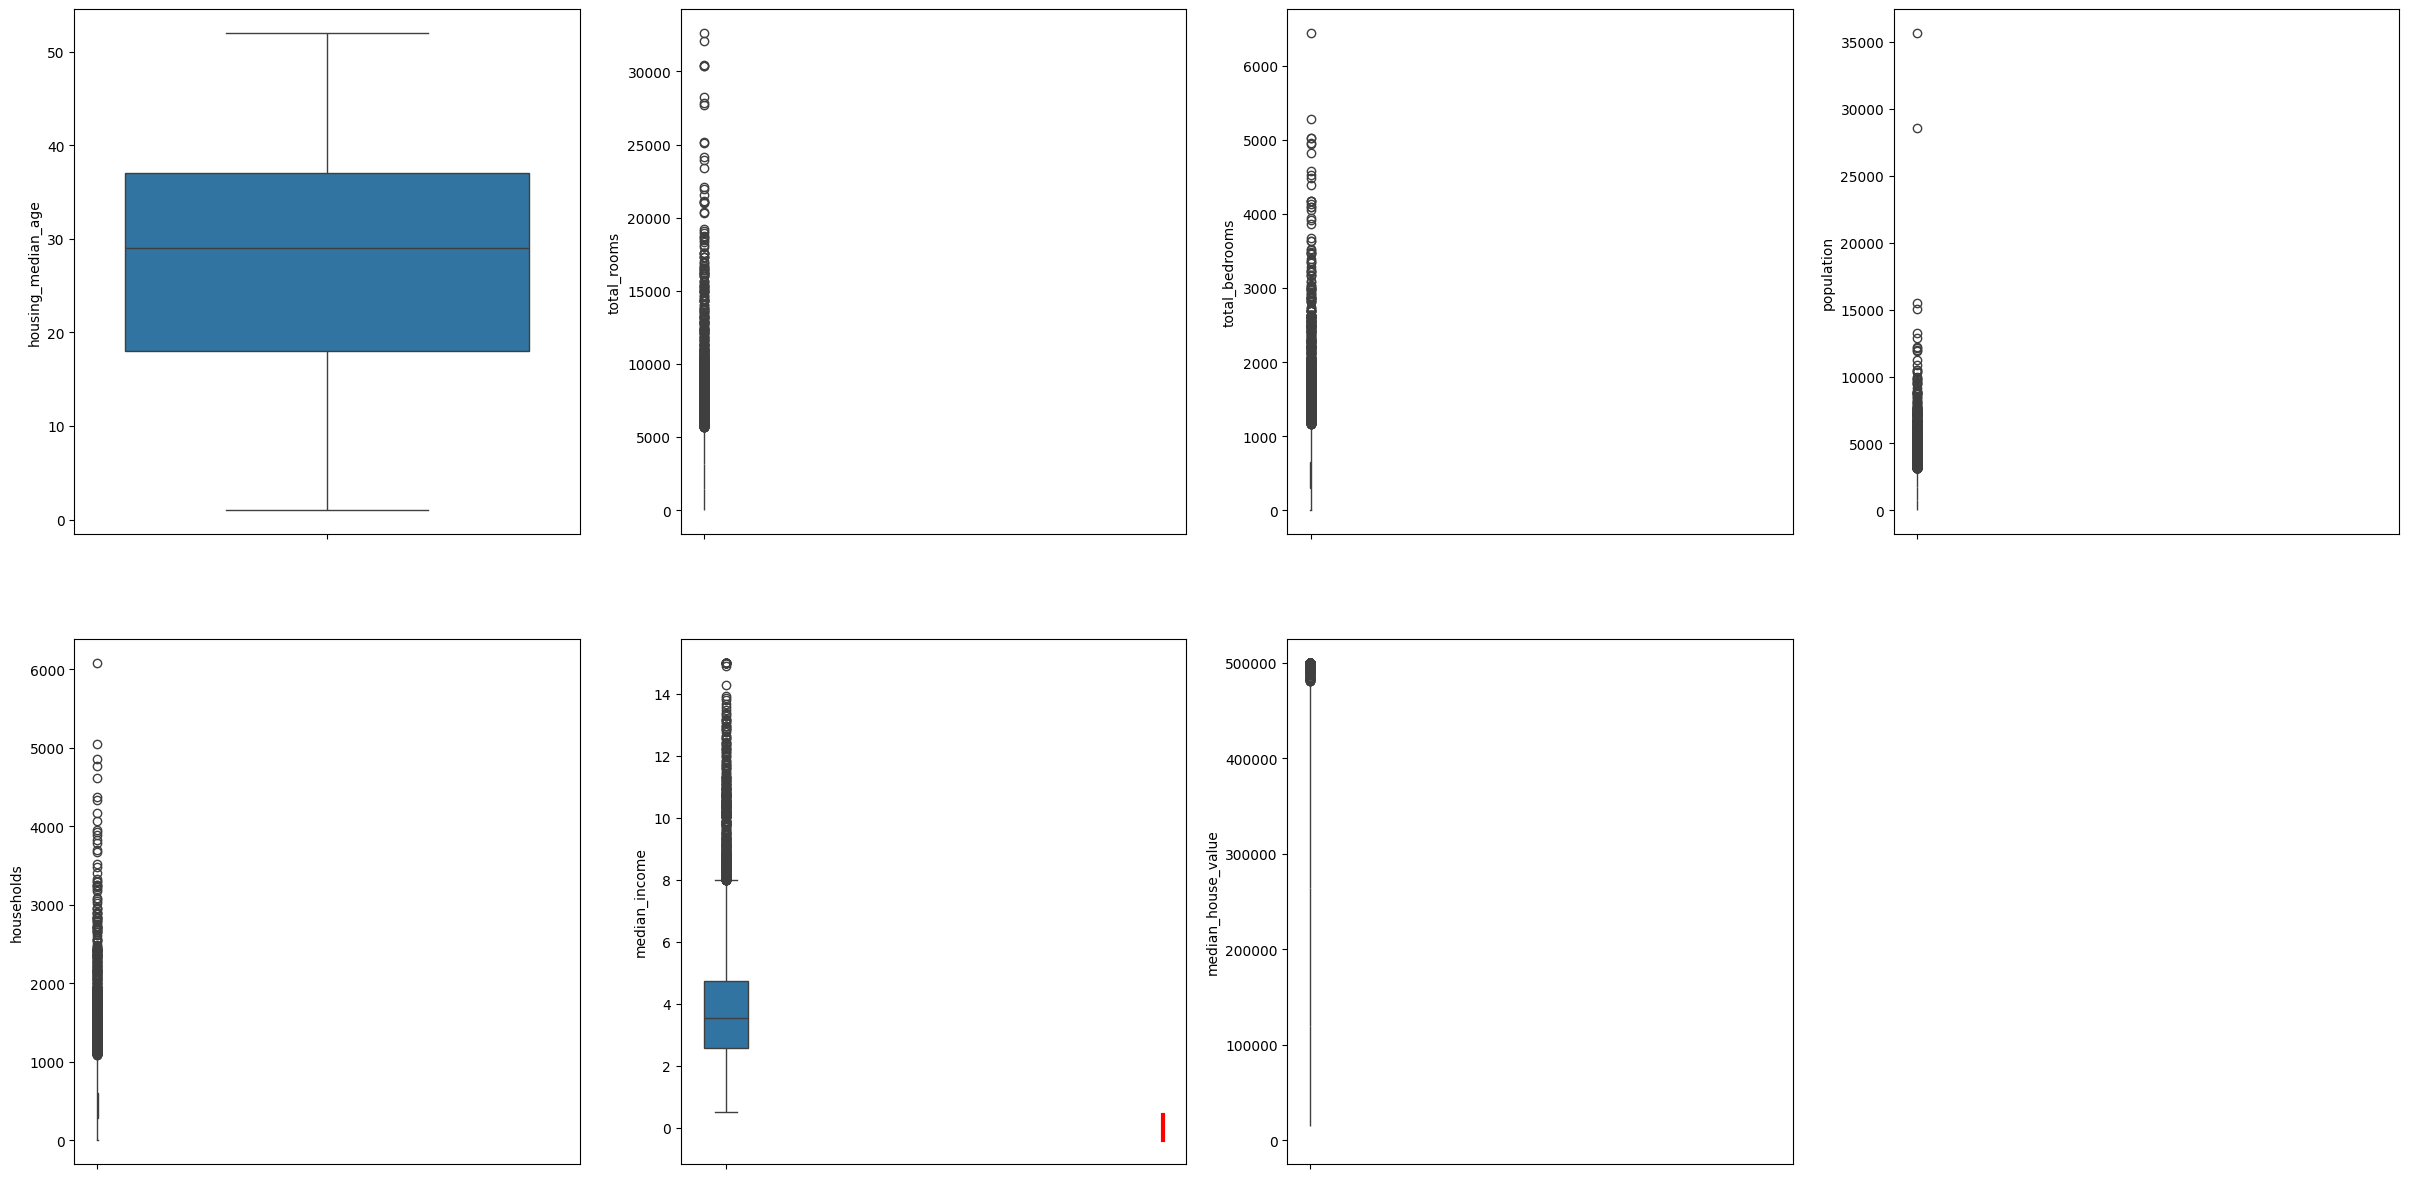

In [21]:

plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
sns.boxplot(df['housing_median_age'])
plt.subplot(2,4,2)
sns.boxplot(df['total_rooms'])
plt.plot([7500, 7500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,3)
sns.boxplot(df['total_bedrooms'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,4)
sns.boxplot(df['population'])
plt.plot([5000, 5000], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,5)
sns.boxplot(df['households'])
plt.plot([1500, 1500], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,6)
sns.boxplot(df['median_income'])
plt.plot([8, 8], [-0.4, 0.4], linewidth=3, c='r')
plt.subplot(2,4,7)
sns.boxplot(df['median_house_value'])
plt.plot([500000, 500000], [-0.4, 0.4], linewidth=3, c='r')
plt.show()


Outlier yang akan kita hilangkan adalah outlier yang melebihi garis merah karena memiliki jarak antar data yang relatif tinggi. Pada feature median_house_value di batasi sampai value 500.000, untuk membatasi model prediksi.

In [22]:
out1 = df[df['total_rooms'] > 7500]
out2 = df[df['total_bedrooms'] > 1500]
out3 = df[df['population'] > 5000]
out4 = df[df['households'] > 1500]
out5 = df[df['median_income'] > 8]
out6 = df[df['median_house_value'] > 500000]

out_all = pd.concat([out1, out2, out3, out4, out5, out6], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0
13,-117.50,33.96,12.0,7923.0,1470.0,4861.0,1385.0,4.2985,INLAND,139200.0
22,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND,178800.0
45,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,INLAND,203400.0
...,...,...,...,...,...,...,...,...,...,...
14302,-122.42,37.80,52.0,741.0,170.0,277.0,165.0,4.4712,NEAR BAY,500001.0
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


In [23]:
out_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 5 to 14413
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1393 non-null   float64
 1   latitude            1393 non-null   float64
 2   housing_median_age  1393 non-null   float64
 3   total_rooms         1393 non-null   float64
 4   total_bedrooms      1393 non-null   float64
 5   population          1393 non-null   float64
 6   households          1393 non-null   float64
 7   median_income       1393 non-null   float64
 8   ocean_proximity     1393 non-null   object 
 9   median_house_value  1393 non-null   float64
dtypes: float64(9), object(1)
memory usage: 119.7+ KB


In [24]:
print('Persentage Outlier')
len(out_all)/len(df)*100

Persentage Outlier


9.641472868217054

Setelah outliernya dihilangkan, kita mendapatkan hasil 1393 data atau sebanyak 9,64% dari total data.

### **3.3 Handling Outlier**

In [25]:
df.drop(out_all.index, axis = 0, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13055 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13055 non-null  float64
 1   latitude            13055 non-null  float64
 2   housing_median_age  13055 non-null  float64
 3   total_rooms         13055 non-null  float64
 4   total_bedrooms      13055 non-null  float64
 5   population          13055 non-null  float64
 6   households          13055 non-null  float64
 7   median_income       13055 non-null  float64
 8   ocean_proximity     13055 non-null  object 
 9   median_house_value  13055 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


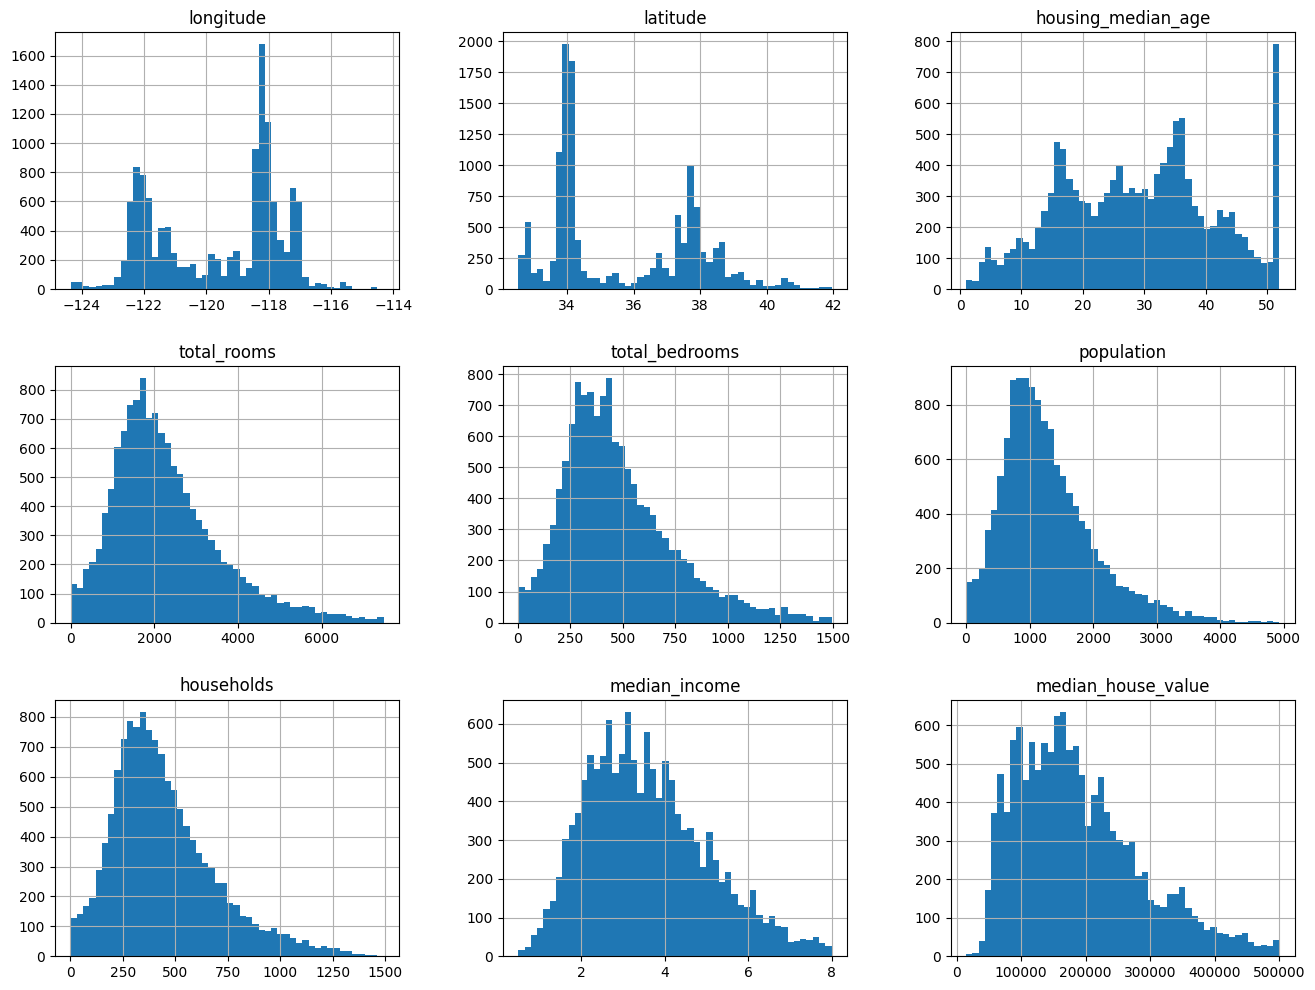

In [27]:
hist_a_ho = df.hist(bins=50,figsize=(16,12))
hist_a_ho
plt.show()

Dapat kita lihat pada histogram diatas, bahwa pengurangan data yang dilakukan pada outlier dapat membuat data menjadi distribusi normal daripada data sebelumnya.

### **3.4 Data Unik & Clean**

In [28]:
tipe = []
jumlah = []
sample = []
kosong = []
maksimal = []

for i in df.columns :
    sample.append(df[i].unique()[:8])
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)
    kosong.append(df[i].isna().sum())
    maksimal.append(df[i].max())

pd.DataFrame({'dataFeatures':df.columns,
              'dataType':tipe,
              'Nunique':jumlah,
              'Unique':sample,
              'NaN':kosong,
              'Max':maksimal
             })

,dataFeatures,dataType,Nunique,Unique,NaN,Max
0,longitude,float64,795,"[-119.79, -122.21, -118.04, -118.28, -119.81, ...",0,-114.31
1,latitude,float64,831,"[36.73, 37.77, 33.87, 34.06, 38.69, 37.28, 37....",0,41.95
2,housing_median_age,float64,52,"[52.0, 43.0, 17.0, 50.0, 18.0, 4.0, 31.0, 27.0]",0,52.0
3,total_rooms,float64,4559,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 3917.0,...",0,7483.0
4,total_bedrooms,float64,1326,"[28.0, 328.0, 396.0, 1196.0, 194.0, 638.0, 133...",0,1494.0
5,population,float64,3014,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 1809.0, ...",0,4930.0
6,households,float64,1245,"[40.0, 277.0, 364.0, 1000.0, 167.0, 564.0, 124...",0,1492.0
7,median_income,float64,8670,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 5.2586,...",0,8.0
8,ocean_proximity,object,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]",0,NEAR OCEAN
9,median_house_value,float64,3438,"[47500.0, 100000.0, 285800.0, 175000.0, 59200....",0,500000.0


Ada beberapa hal yang bisa kita pahami dari kolom diatas, antara lain :

1. Dataset California Housing Price memiliki 9 kolom dan 2095 baris. Namun setelah dilakukan handling pada missing value dan outlier, dataset California Housing Price memiliki 9 kolom dan 13055 baris.
2. Tipe data pada masing-masing feature sudah sesuai.
* Kolom ocean_proximity memiliki data tipe object yang berisi kategori.
* Kolom longitude,latitude,housing_median_age,total_rooms,total_bedrooms population,households,median_income,ocean_proximity median_house_value memiliki data tipe float yang berisi nilai numerik kontinus.

### **3.5 Data Visualization**

### **3.3 Identify Spelling Errors**

In [29]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total category on'{col}' : {df[col].nunique()}")

Total category on'ocean_proximity' : 5


In [30]:
for col in categoric_features.columns:
    print(f"Columns: {col}")
    print(df[col].value_counts())
    print()

Columns: ocean_proximity
ocean_proximity
<1H OCEAN     5671
INLAND        4306
NEAR OCEAN    1668
NEAR BAY      1408
ISLAND           2
Name: count, dtype: int64



### **3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

- Check Distribution (Numerical Variable)

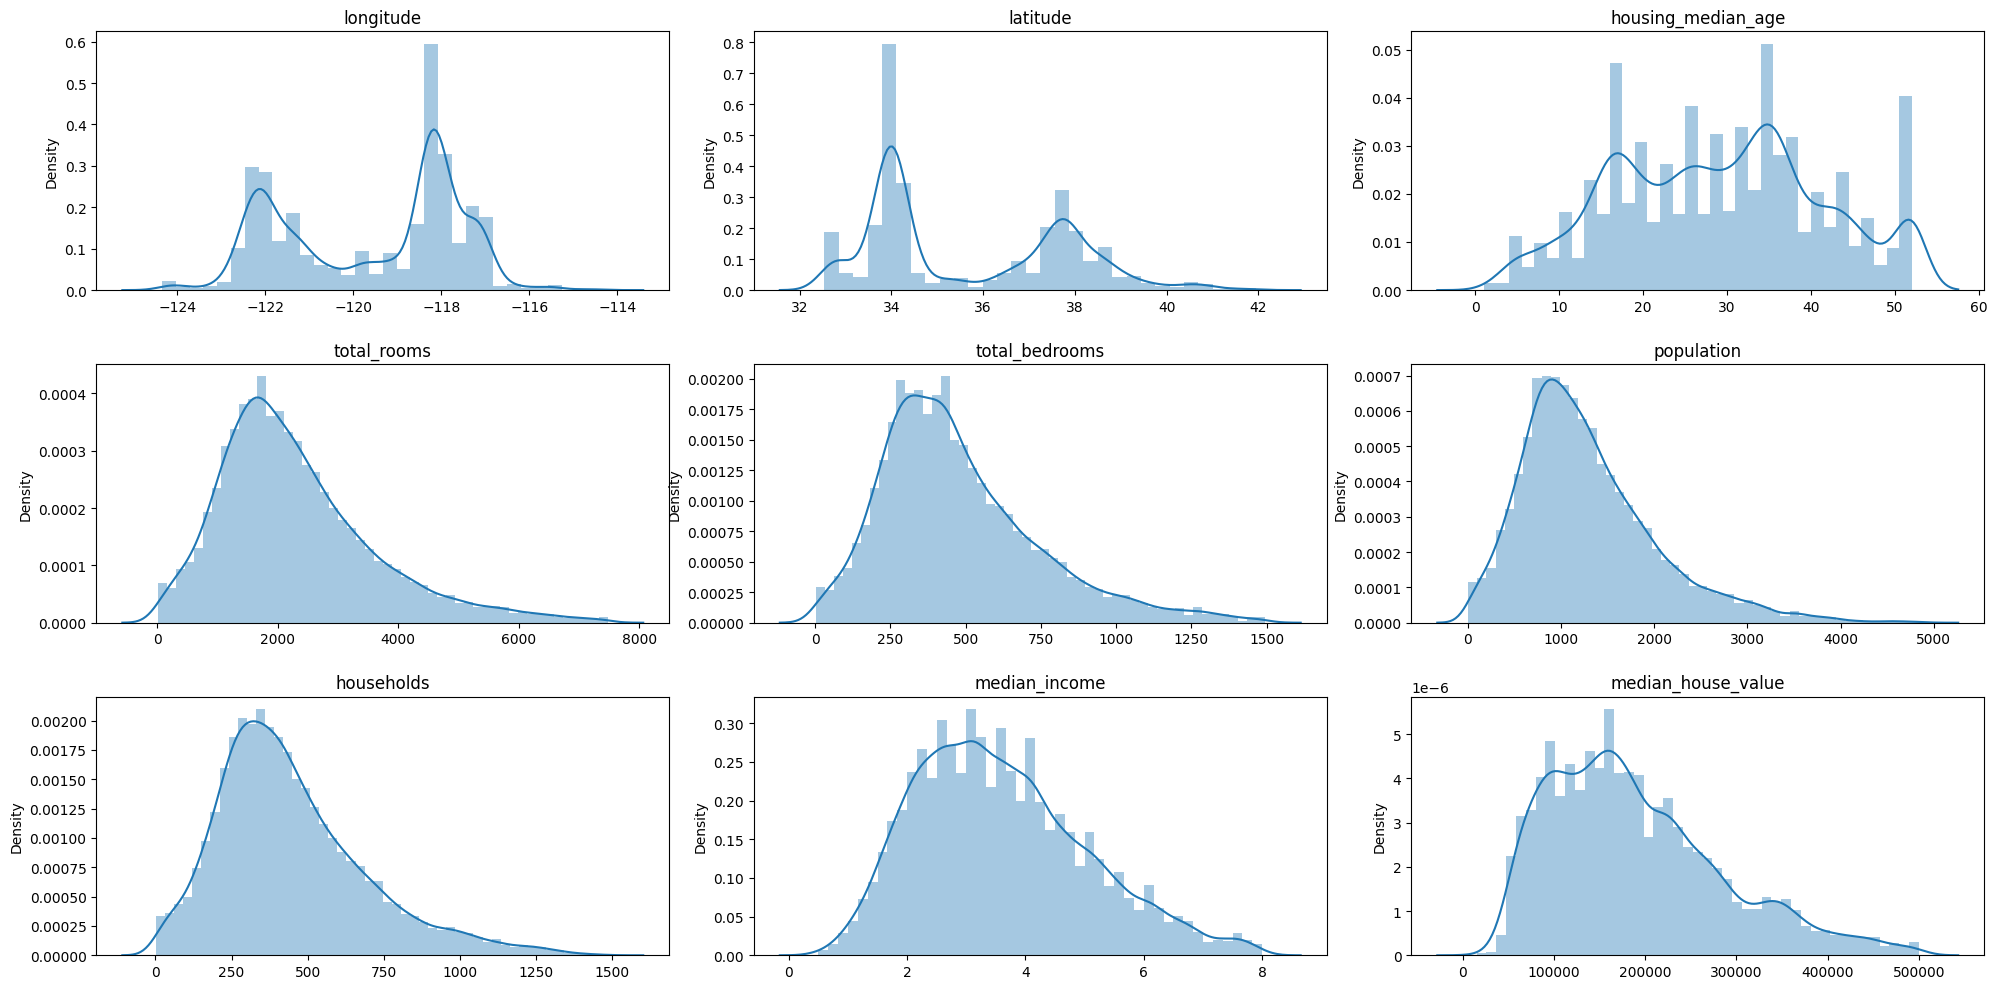

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    axs[index].set_title(k)
    sns.distplot(x=df[k], ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

## **Section 4. Data Generation**

## **Section 5. Exploratory Data Analysis (EDA)**

Sebelum menganalisa data, kita perlu melakukan pengecekan terhadap data yang hilang atau data yang duplikat. Hal ini perlu dilakukan agar terhindar dari kesalahan yang dapat mempengaruhi proses analisa selanjutnya.

In [32]:
print('Pada data frame terdapat', df.shape[0], 'baris dan', df.shape[1], 'kolom.')

Pada data frame terdapat 13055 baris dan 10 kolom.


Dataset merupakan data dari rata-rata harga rumah di Negara California pada tahun 1990. Pada data frame diatas, terdapat 14.448 baris dan 10 kolom. Dimana setiap baris data merepresentasikan informasi terkait properti perumahan.

In [33]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5671
INLAND        4306
NEAR OCEAN    1668
NEAR BAY      1408
ISLAND           2
Name: count, dtype: int64

Pada kolom ocean_proximity memiliki nilai yang paling tinggi yaitu sebanyak 6.369 orang yang memilih perumahan dekat dengan <1H OCEAN. Hal ini menandakan bahwa perumahan yang paling diminati yaitu yang lokasi rumah dekat dengan laut.

In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13055.000000,13055.000000,13055.00000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000
mean,-119.580899,35.670202,29.01509,2300.133282,478.175642,1288.318805,447.219763,3.587721,189269.053773
std,2.005525,2.160803,12.28545,1298.658210,264.097702,732.872589,245.549974,1.446815,95703.013959
min,-124.350000,32.540000,1.00000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.770000,33.940000,19.00000,1408.000000,293.000000,781.000000,276.000000,2.502700,114700.000000
50%,-118.520000,34.280000,29.00000,2043.000000,428.000000,1149.000000,401.000000,3.402800,171400.000000
75%,-118.010000,37.730000,37.00000,2937.500000,613.000000,1657.000000,574.000000,4.503300,243500.000000
max,-114.310000,41.950000,52.00000,7483.000000,1494.000000,4930.000000,1492.000000,8.000000,500000.000000


In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13055 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13055 non-null  float64
 1   latitude            13055 non-null  float64
 2   housing_median_age  13055 non-null  float64
 3   total_rooms         13055 non-null  float64
 4   total_bedrooms      13055 non-null  float64
 5   population          13055 non-null  float64
 6   households          13055 non-null  float64
 7   median_income       13055 non-null  float64
 8   ocean_proximity     13055 non-null  object 
 9   median_house_value  13055 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Tipe data diatas sudah sesuai dengan featurenya masing-masing. Terdaoat 10 feature pada dataset, dimana:

* 9 feature merupakan data dengan tipe numerikal kontinus yaitu longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value.
* 1 feature merupakan data dengan tipe objek yaitu ocean_proximity.

Karena ada informasi geografis (lintang dan bujur), mari kita buat scatterplot semua distrik untuk memvisualisasikan data.

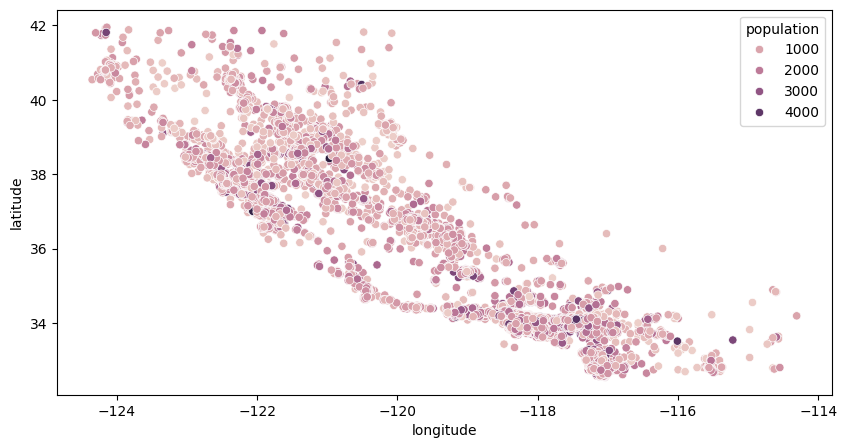

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='population')
plt.show()

Dari hasil visualisasi diatas kita tidak dapat melihat pola tertentu dengan jelas. Mari kita visualisasikan ditempat mana saja yang memiliki kepadatan titik data yang tinggi.

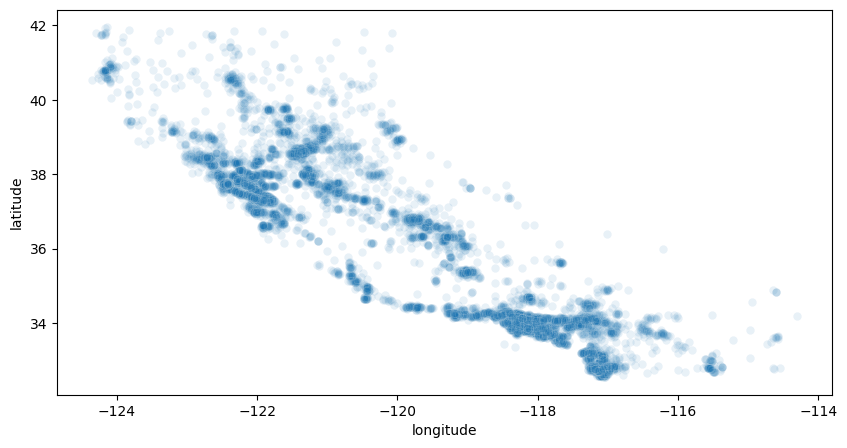

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.1)
plt.show()

Sekarang kita dapat melihat dengan jelas daerah dengan kepadatan tinggi ditandai dengan warna biru tua yang terlihat jelas.

Terakhir kita akan mengecek harga rumah dan populasi distrik ke plot yang tersebar.

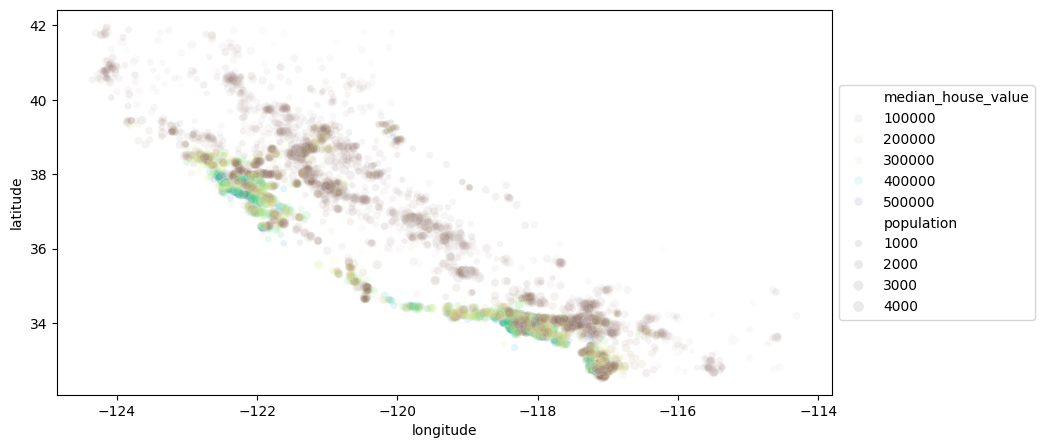

In [38]:
plt.figure(figsize=(10, 5))
g = sns.scatterplot(data=df, x='longitude', y='latitude',
                    hue='median_house_value', size='population',
                    alpha=0.1, palette="terrain_r")
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Seperti yang dapat kita lihat, warna yang lebih tua menunjukkan bahwa harga rumah dengan lokasi memiliki hubungan yang kuat (misalnya, dekat dengan laut) dan kepadatan penduduk.

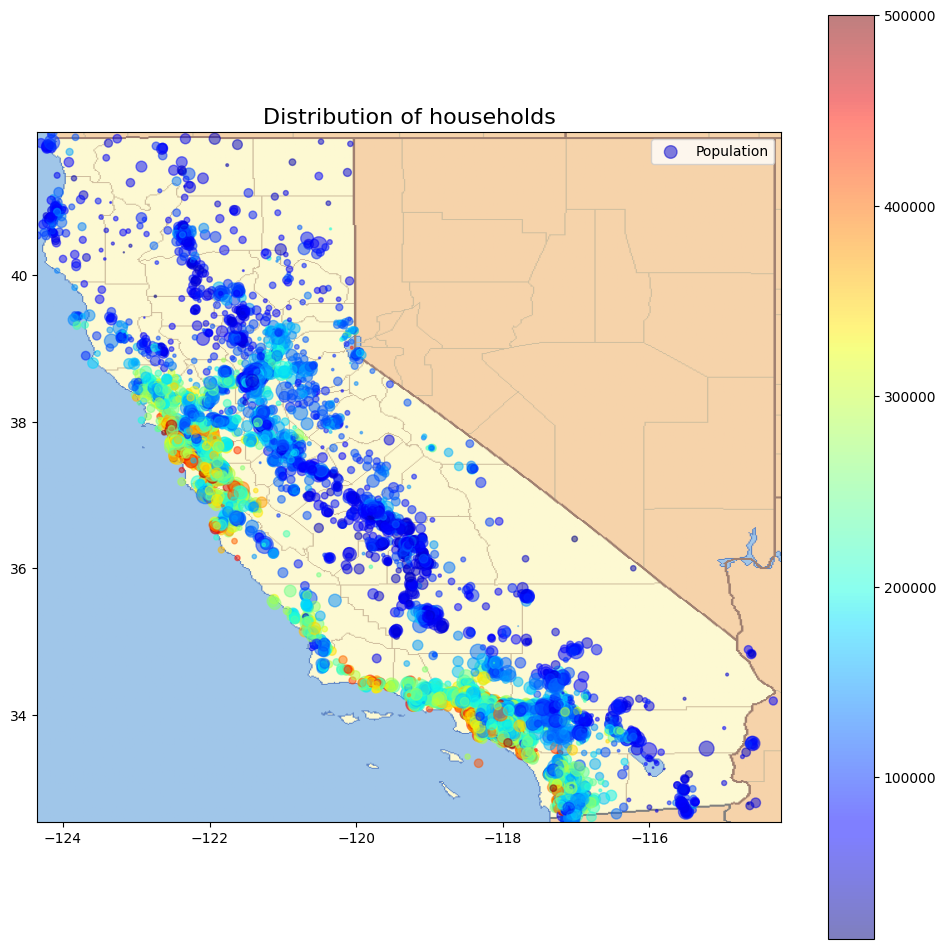

In [39]:
#dimasukkin ke eda
plt.figure(figsize=(12,12))
img=plt.imread(r'C:\Users\User\OneDrive\Dokumen\capstone3\machine_learning\california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.5,s=df['population']/30,c=df['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

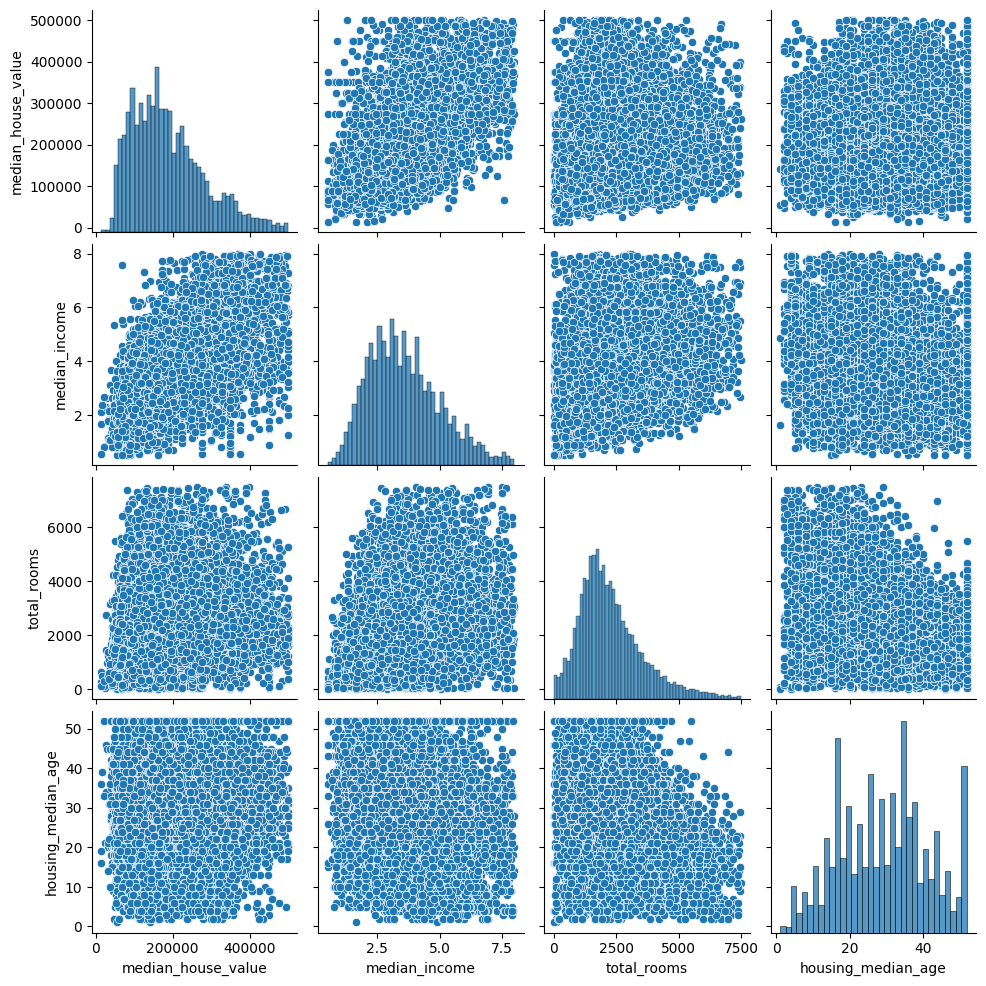

In [40]:
sns.pairplot(df[['median_house_value','median_income','total_rooms','housing_median_age']])

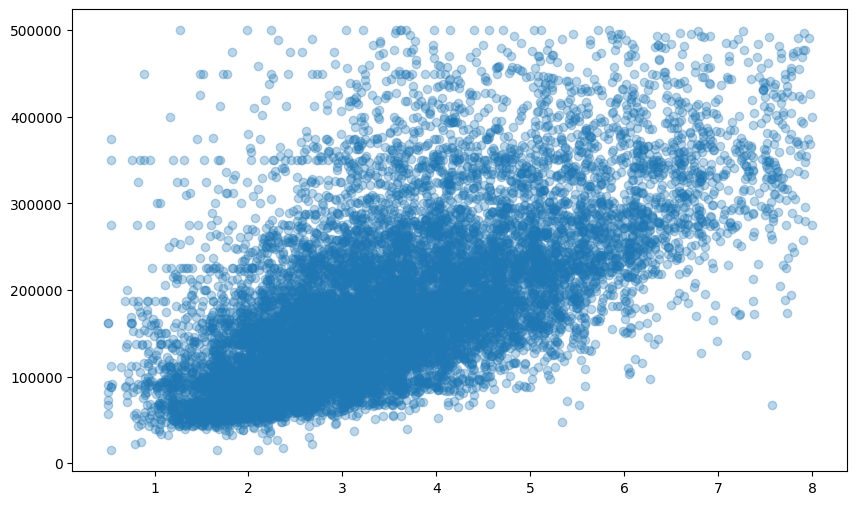

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['median_house_value'],x=df['median_income'],alpha=0.3)


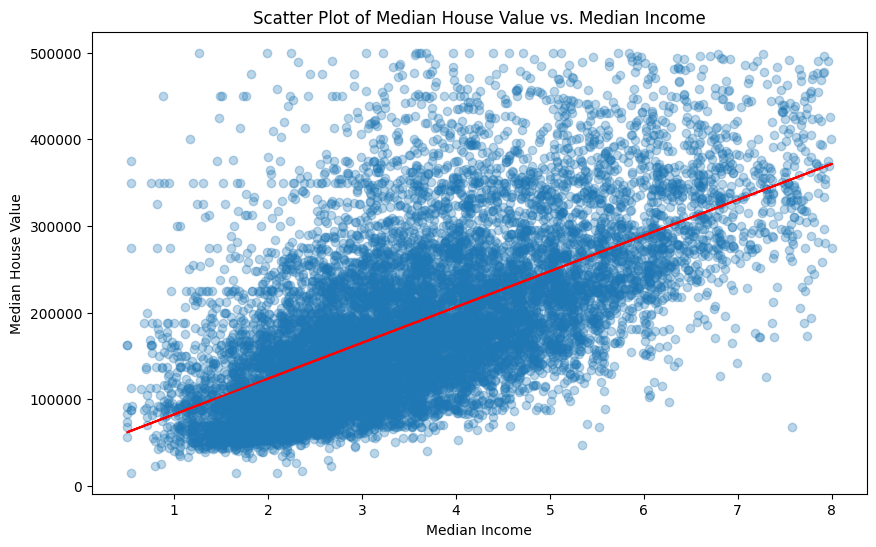

In [42]:
#2
plt.figure(figsize=(10, 6))
plt.scatter(x=df['median_income'], y=df['median_house_value'], alpha=0.3)

# Calculate and plot the linear regression line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_income'], df['median_house_value'])
plt.plot(df['median_income'], slope*df['median_income'] + intercept, color='red')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot of Median House Value vs. Median Income')
plt.show()

## **Section 6. Data Preparation**

### **6.1 Data Transformation (Feature Engineering)**

**Spliting Data**

In [43]:
# Define x,y
x = df.drop(columns='median_house_value')
y = df['median_house_value']

# Spliting dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 20)

**Data Transforming**

In [44]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['longitude','latitude','housing_median_age',
                                'total_rooms','total_bedrooms','population',
                               'households','median_income']),
    ('binary', BinaryEncoder(), ['ocean_proximity'])
], remainder = 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('binary', BinaryEncoder(),
                                 ['ocean_proximity'])])

Transforming adalah proses pengubahan data mentah menjadi data yang dapat diproses oleh model machine learning. Robust Scaler adalah teknik normalisasi yang dapat digunakan untuk mengubah skala data yang memiliki outlier. Binary Encoding adalah teknik encoding yang dapat digunakan untuk mengubah data kategorikal menjadi data numerikal.

* Pada kolom longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income dilakukan transforming dengan Robust Scaler.
* Pada kolom ocean_proximity dilakukan transforming dengan Binary Encoder.

## **Section 7. Model Development**

**7.1 Developing the Model Pipeline**

In [45]:
import sklearn
print(sklearn.__version__)

1.5.2


In [46]:
from sklearn.metrics import get_scorer_names, accuracy_score, make_scorer

Metrik diatas digunakan untuk menunjukkan scoring pada proses benchmark model dan hyperparameter tuning.

Cross Validation

In [47]:
# Define Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
tree = DecisionTreeRegressor()
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

Disini kita menggunakan 5 algoritma model yang akan diuji, yaitu :

1. Linear Regresi
2. K-Neighbors Regressor
3. Random Forest Regressor
4. Decision Tree Regressor
5. XGBoost Regressor

In [48]:
models = [lr, knn, rf, tree, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])
    
    # RMSE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_root_mean_squared_error' 
    )

    score_rmse.append(cv_score.round(1))
    nilai_mean_rmse.append(cv_score.mean())
    nilai_std_rmse.append(cv_score.std())
    
    # MAE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_mean_absolute_error' 
    )

    score_mae.append(cv_score.round(1))
    nilai_mean_mae.append(cv_score.mean())
    nilai_std_mae.append(cv_score.std())
    
    # MAPE
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_mean_absolute_percentage_error' 
    )

    score_mape.append(cv_score.round(1))
    nilai_mean_mape.append(cv_score.mean())
    nilai_std_mape.append(cv_score.std())

**7.2 Model Benchmarking (Comparing model base performance)**

In [49]:
pd.DataFrame({
    'Model': ['KNN', 'XGBoost', 'Decision Tree', 'Random Forest', 'Linear Regression'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,KNN,-60324.521158,1428.572555,-44619.032174,862.026142,-0.277515,0.005071
1,XGBoost,-57009.298174,1133.026350,-39864.982633,624.989577,-0.233415,0.007068
2,Decision Tree,-48381.021772,1546.597463,-32684.782889,841.473067,-0.194527,0.003180
3,Random Forest,-68258.963503,1920.136717,-44747.483803,826.332899,-0.262051,0.006088
4,Linear Regression,-45692.190450,1142.225888,-30821.451193,423.586948,-0.183090,0.003838



Dari hasil cross validation yang telah dilakukan bahwa terdapat dua algoritma yang menunjukkan nilai standar deviasi dari RMSE, MAE, MAPE yang paling kecil yaitu model XGBoost dan Linear Regression Tree

Predict Test Set with Benchmark Model

In [50]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
models = {
    'XGBoost': XGBRegressor(objective="reg:squarederror", random_state=42),
    'Linear Regression': LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = [] 

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))
    score_r2.append(r2_score(ytest, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse,
                                    'MAE': score_mae, 
                                    'MAPE': score_mape,
                                    'R-Squared' : score_r2
                                    }, index=models.keys())
                                   
score_before_tuning

,RMSE,MAE,MAPE,R-Squared
XGBoost,44424.807449,30405.368263,17.830840,0.784875
Linear Regression,58985.766489,43905.055032,27.287757,0.620742


Dari hasil pengujian dengan data test, terlihat bahwa algoritma model XGBoost lebih unggul dari semua matrik. Untuk membuktikannya hal tersebut, kita perlu melakukan tuning kedua untuk memastikan apakah XGBoost merupakan model dengan performance terbaik atau bukan.

**7.3 Tune Model**

In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Dari hasil pengujian dengan data test, terlihat bahwa algoritma model XGBoost lebih unggul dari semua matrik. Untuk membuktikannya hal tersebut, kita perlu melakukan tuning kedua untuk memastikan apakah XGBoost merupakan model dengan performance terbaik atau bukan.

Hyperparameter Tuning

In [53]:
# Hyperparameter
hyperparam = {
    'modeling__criterion': ['absolute_error', 'squared_error'],
    'modeling__max_depth': range(1,31,5), 
    'modeling__min_samples_split': range(2,31,3)
}

# Algoritma (Benchmark Model)
model = XGBRegressor(objective="reg:squarederror", random_state=42, max_depth=5)

# Pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# Gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model,                          
    param_grid = hyperparam,                        
    cv = 5,                                         
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1                                     
)

# Fit
gridsearch.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['ocean_proximity'])])),
                                       ('modeling',
                                        XGBRegressor(base_score=No...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'modeling__criterion': ['absolute_error',
                                                 'squared_error'],
                         'modeling__max_depth': range(1, 31, 5),
                         'modeling__min_samples_split': range(2, 31, 3)},
             scoring='neg_mean_absolute_percentage_error')

In [54]:
# Best Parameter
gridsearch.best_params_

{'modeling__criterion': 'absolute_error',
 'modeling__max_depth': 6,
 'modeling__min_samples_split': 2}

In [55]:
# Best Score
gridsearch.best_score_

np.float64(-0.1830903162536005)

In [56]:
# Cross Validation Result
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.764136,0.028699,0.031206,0.002971,absolute_error,6,8,"{'modeling__criterion': 'absolute_error', 'mod...",-0.18520,-0.188142,-0.176751,-0.181426,-0.183933,-0.183090,0.003838,1
13,0.773620,0.027750,0.029947,0.001645,absolute_error,6,11,"{'modeling__criterion': 'absolute_error', 'mod...",-0.18520,-0.188142,-0.176751,-0.181426,-0.183933,-0.183090,0.003838,1
15,0.784321,0.024014,0.031786,0.009000,absolute_error,6,17,"{'modeling__criterion': 'absolute_error', 'mod...",-0.18520,-0.188142,-0.176751,-0.181426,-0.183933,-0.183090,0.003838,1
14,0.784445,0.025574,0.029721,0.002705,absolute_error,6,14,"{'modeling__criterion': 'absolute_error', 'mod...",-0.18520,-0.188142,-0.176751,-0.181426,-0.183933,-0.183090,0.003838,1
10,0.765231,0.018332,0.031820,0.001933,absolute_error,6,2,"{'modeling__criterion': 'absolute_error', 'mod...",-0.18520,-0.188142,-0.176751,-0.181426,-0.183933,-0.183090,0.003838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.218276,0.007000,0.023250,0.001142,squared_error,1,14,"{'modeling__criterion': 'squared_error', 'mode...",-0.25889,-0.261080,-0.259510,-0.268907,-0.275204,-0.264718,0.006353,101
66,0.226714,0.008620,0.023905,0.002703,squared_error,1,20,"{'modeling__criterion': 'squared_error', 'mode...",-0.25889,-0.261080,-0.259510,-0.268907,-0.275204,-0.264718,0.006353,101
67,0.211884,0.005651,0.022242,0.002537,squared_error,1,23,"{'modeling__criterion': 'squared_error', 'mode...",-0.25889,-0.261080,-0.259510,-0.268907,-0.275204,-0.264718,0.006353,101
68,0.215108,0.006301,0.023045,0.001647,squared_error,1,26,"{'modeling__criterion': 'squared_error', 'mode...",-0.25889,-0.261080,-0.259510,-0.268907,-0.275204,-0.264718,0.006353,101



Predict Test Set Hyperparameter Tuning with XGB

Before Hyperparameter Tuning with XGB

In [57]:
# Algoritma
model = xgb

# Pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(xtrain, ytrain)

# Predict
y_pred_before = pipe_model.predict(xtest)

# MAPE pada model sebelum tuning
mean_absolute_percentage_error(ytest, y_pred_before)

np.float64(17.830839684005113)


After Hyperparameter Tuning with XGB

In [58]:
# Best Parameter
model_tuning = XGBRegressor(
    max_depth = 6, 
    min_samples_split = 2, 
    criterion = 'absolute_error', 
    random_state = 0
)

# Pipeline
pipe_model_tuning = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model_tuning)
])

pipe_model_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('binary', BinaryEncoder(),
                                                  ['ocean_proximity'])])),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, min_samples_split=2,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [59]:
# Define Best Model (After Tunning)
best_model = gridsearch.best_estimator_

# Fit
best_model.fit(xtrain, ytrain)

# Predict
y_pred_after = best_model.predict(xtest)

# MAPE untuk model setelah tuning
mean_absolute_percentage_error(ytest, y_pred_after)

np.float64(17.830839684005113)

Compare Before & After Tuning

In [60]:
print(mean_absolute_percentage_error(ytest, y_pred_before) * 100, 'MAPE sebelum tuning')
print(mean_absolute_percentage_error(ytest, y_pred_after) * 100, 'MAPE setelah tuning')

1783.0839684005114 MAPE sebelum tuning
1783.0839684005114 MAPE setelah tuning


Dari hasil hyperparameter tuning diatas, membuktikan bahwa nilai dari MAPE sebelum dan sesudah pada algoritma model XGBoost tidak mengalami perubahan. Hal ini dapat kita artikan bahwa model XGBoost sudah mencapai nilai optimum untuk hyperparameter yang diberikan. Jadi kita tidak perlu melakukan tuning lebih lanjut karena performa modelnya sudah cukup baik.

**7.4 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

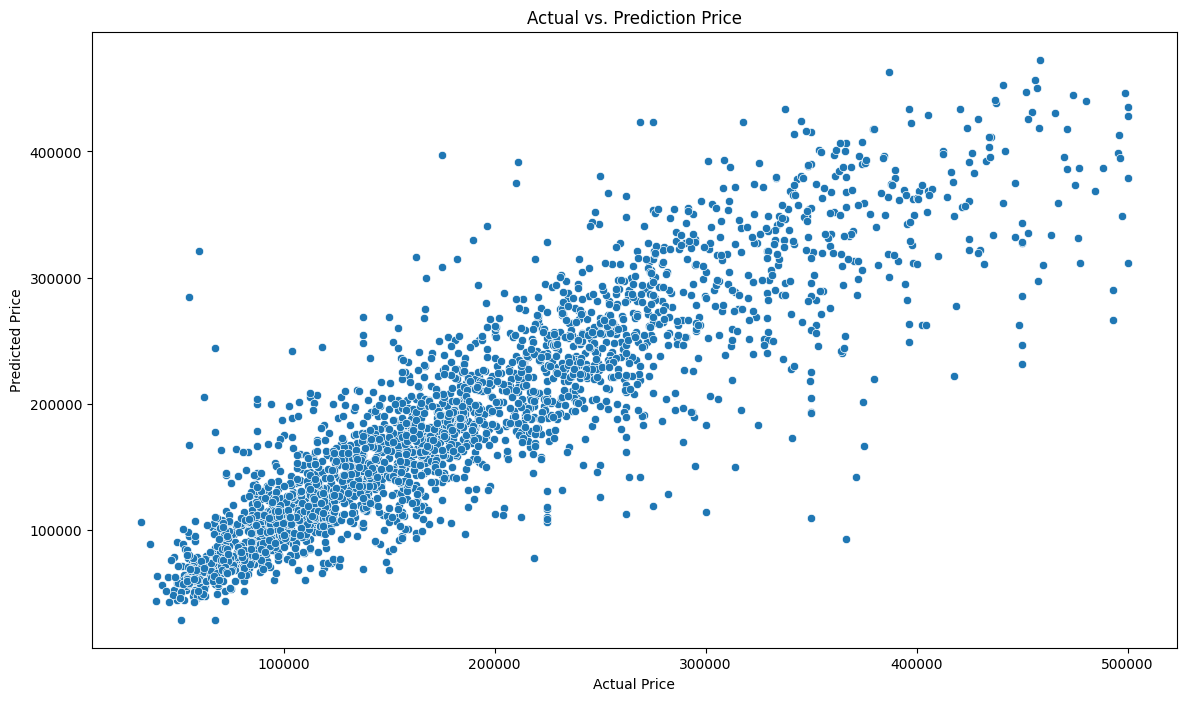

In [ ]:
#residual analysis
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=ytest, y=y_pred_after).set(title='Actual vs. Prediction Price', 
                                            xlabel='Actual Price', 
                                            ylabel='Predicted Price');


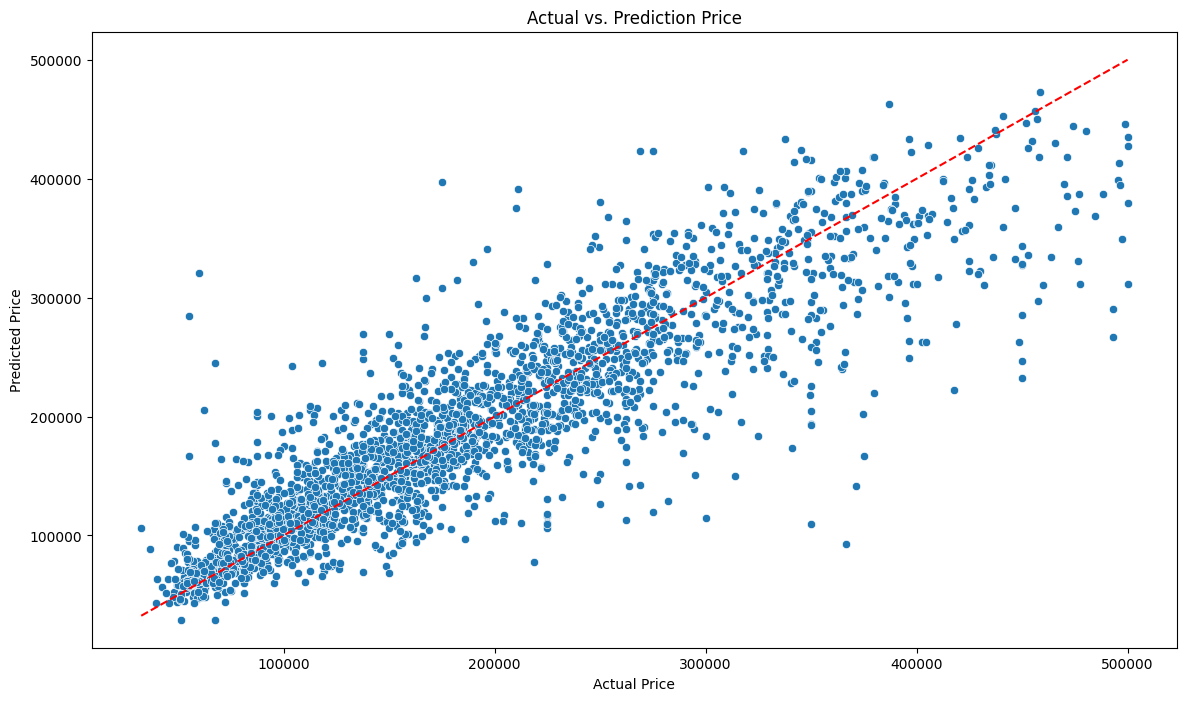

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))  # Add this line
plot = sns.scatterplot(x=ytest, y=y_pred_after).set(title='Actual vs. Prediction Price', 
                                                    xlabel='Actual Price', 
                                                    ylabel='Predicted Price')

# Add a diagonal line representing perfect prediction
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')

plt.show()

**7.5 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

In [67]:
features = transformer.get_feature_names_out()

In [68]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = features)

In [69]:
importance_table

,imp
scaler__longitude,0.036716
scaler__latitude,0.036925
scaler__housing_median_age,0.024904
scaler__total_rooms,0.011729
scaler__total_bedrooms,0.014233
scaler__population,0.017599
scaler__households,0.015107
scaler__median_income,0.156226
binary__ocean_proximity_0,0.329839
binary__ocean_proximity_1,0.042023


<Axes: >

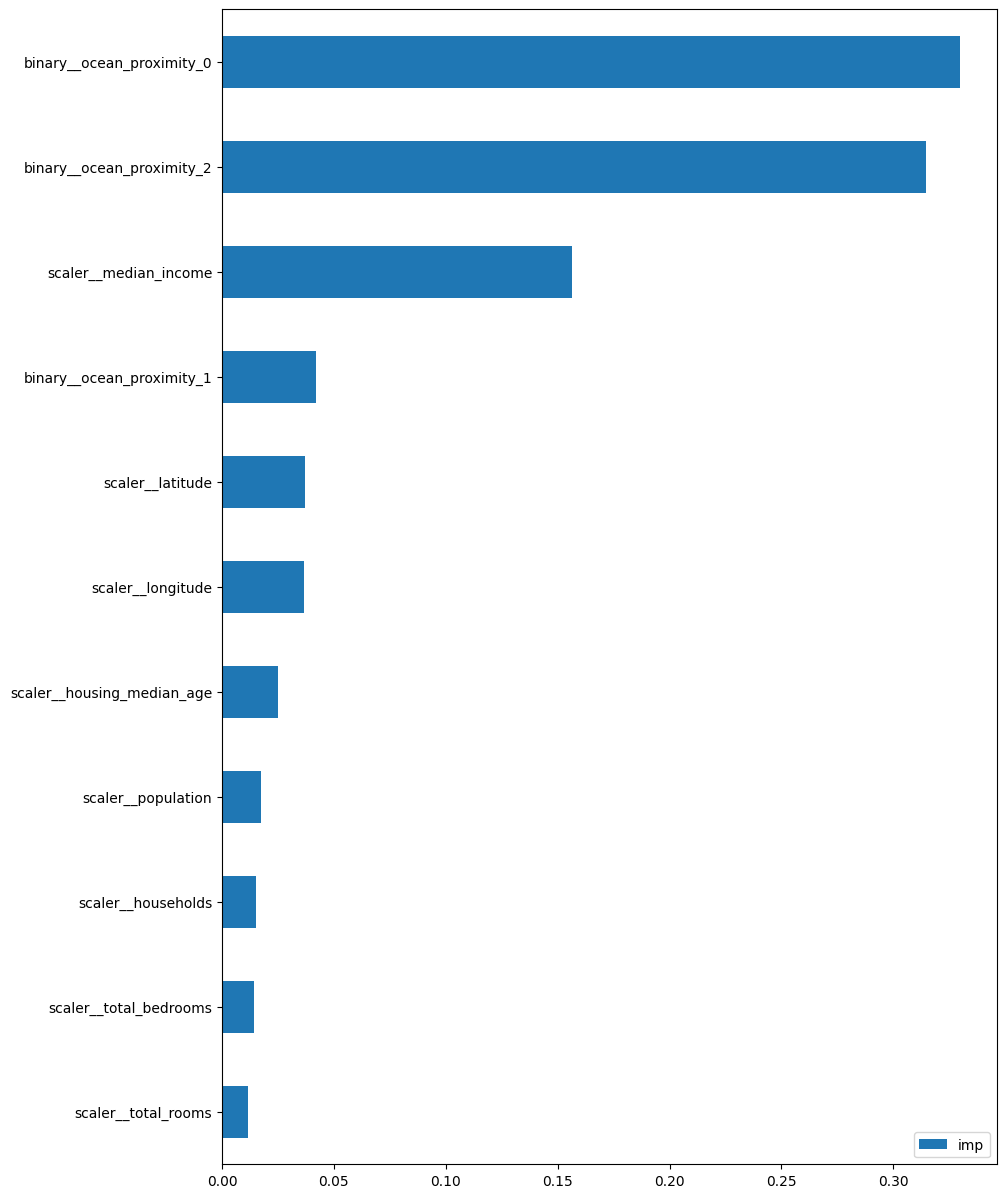

In [70]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

Analisis Bisnis: Jarak ke laut (binary_ocean_proximity) memiliki pengaruh yang sangat besar terhadap harga properti. Ini menunjukkan bahwa lokasi properti yang dekat dengan pantai atau laut sangat mempengaruhi harganya. Hasil ini dapat digunakan untuk memahami faktor-faktor apa saja yang paling mempengaruhi harga properti dan dapat dimanfaatkan untuk membuat keputusan bisnis yang lebih baik.

## **Section 8. Model Deployment**

In [72]:
#save model pickle
import _pickle as pickle

In [73]:
pipe_model = Pipeline([('preprocessing', transformer), ('model', XGBRegressor())])
pipe_model.fit(xtrain, ytrain)

pickle.dump(pipe_model, open('Reg_California_Housing_Price.sav', 'wb'))

In [74]:
file_name = 'Reg_California_Housing_Price.sav'

loaded_model = pickle.load(open(file_name, 'rb'))

In [75]:
np.sqrt(mean_squared_error(ytest, loaded_model.predict(xtest)))

np.float64(44424.80744890982)

In [76]:
ytrain

9371     237700.0
6164      69100.0
9751     156600.0
709      413000.0
1014      65800.0
           ...   
10674     85300.0
7864      86700.0
8225     442900.0
4835     118300.0
11874     63100.0
Name: median_house_value, Length: 10444, dtype: float64

In [77]:
ytrain.mean()

np.float64(189337.95451934123)

## **Section 9. Conclusion and Recommendation**

**9.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

- Conclusion (Model)
1. Dengan tujuan mencari model terbaik, kami membandingkan kinerja lima algoritma, termasuk Regresi Linear, K-Nearest Neighbor, Random Forest, Decision Tree, dan XGBoost.
2. Dengan menggunakan RMSE, MAE, MAPE, dan R-squared, kami bisa membandingkan seberapa baik model dalam memprediksi data.
3. Hasil validasi silang menunjukkan bahwa model XGBoost dan Regresi Linear adalah dua model yang paling menonjol, dengan nilai kesalahan prediksi yang paling kecil.
4. Setelah menguji kedua model pada data yang belum pernah dilihat sebelumnya, model XGBoost terbukti lebih baik dalam memprediksi nilai sebenarnya, dengan nilai kesalahan prediksi yang jauh lebih rendah dibandingkan model Regresi Linear.
5. Untuk memastikan kinerja model XGBoost sudah optimal, kami melakukan penyetelan parameter (hyperparameter tuning). Hasilnya menunjukkan bahwa tidak ada peningkatan kinerja setelah penyetelan. Jadi, kami anggap model XGBoost sudah cukup baik dengan pengaturan parameter saat ini.



- Conclusion (Business)

1. Dengan mengembangkan aplikasi berbasis data demografis, pengembang properti di California dapat melakukan transformasi bisnis yang signifikan. Personalisasi produk dan pemasaran yang tepat sasaran adalah kunci untuk memenangkan persaingan di pasar yang semakin kompetitif.

**9.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)

- Recommendation (Model)

1. XGBoost seringkali menghasilkan model dengan akurasi yang sangat tinggi dibandingkan dengan algoritma lainnya
2. XGBoost memiliki mekanisme regularisasi yang kuat untuk mencegah overfitting. Hal ini membuat model yang dihasilkan lebih generalisasi dan dapat bekerja dengan baik pada data baru.
3. XGBoost menyediakan banyak hyperparameter yang dapat di-tuning untuk menyesuaikan model dengan data dan masalah yang spesifik.

- Recommendation (Business)
1. Kita perlu melihat faktor-faktor di luar pasar perumahan, seperti suku bunga dan pendapatan, yang bisa mempengaruhi harga rumah di California.
2. Untuk mendapatkan hasil prediksi yang lebih baik, kita perlu mengumpulkan lebih banyak data yang relevan. Data tambahan ini akan membantu model machine learning kita dalam mengidentifikasi pola-pola kompleks dalam data dan meningkatkan akurasi prediksinya.
3. Model XGBoost dipilih untuk membantu para pengembang properti di California memperkirakan harga rumah. Model ini paling baik digunakan untuk rumah dengan harga antara USD 149.999 hingga USD 500.000. Rata-rata, model ini dapat memprediksi harga rumah dengan kesalahan sekitar 18,2%

tambahan 
1. diselesaikan mengikuti guide line yg dikasih
2. dirapikan untuk penomeran dan dihapus yg tidak dipakai
3. memberikan tambahan penjelasan untuk g belum ada penjelasannya.